Mean Squared Error: 18.545690455742978
R-squared: 0.6215786620253058


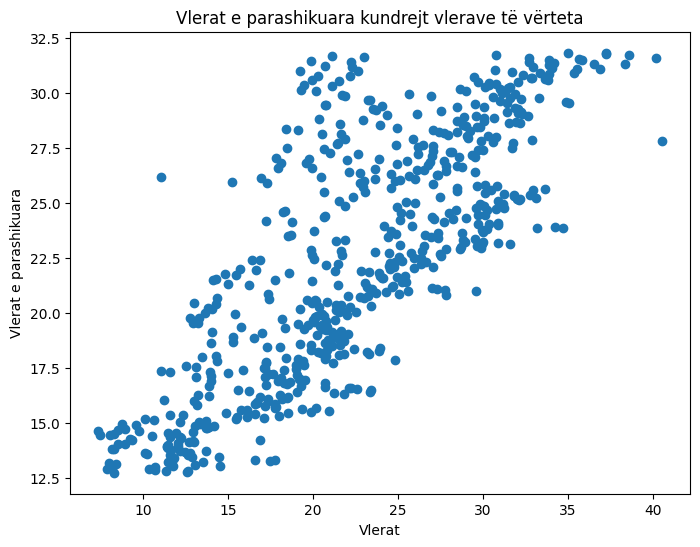

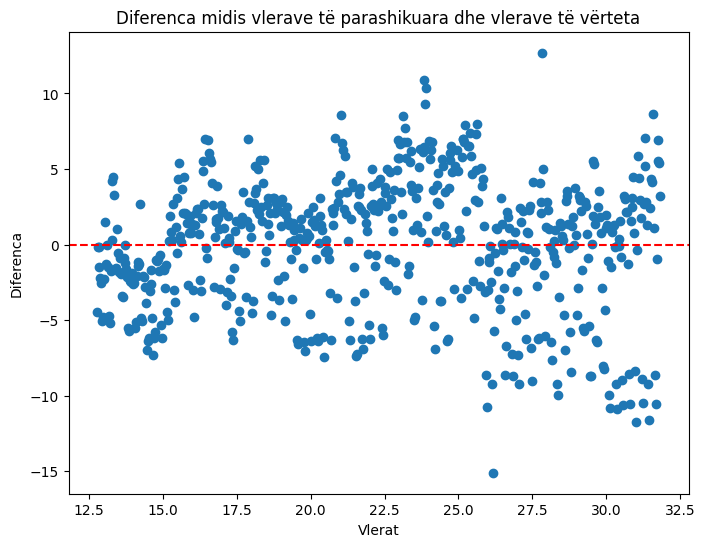

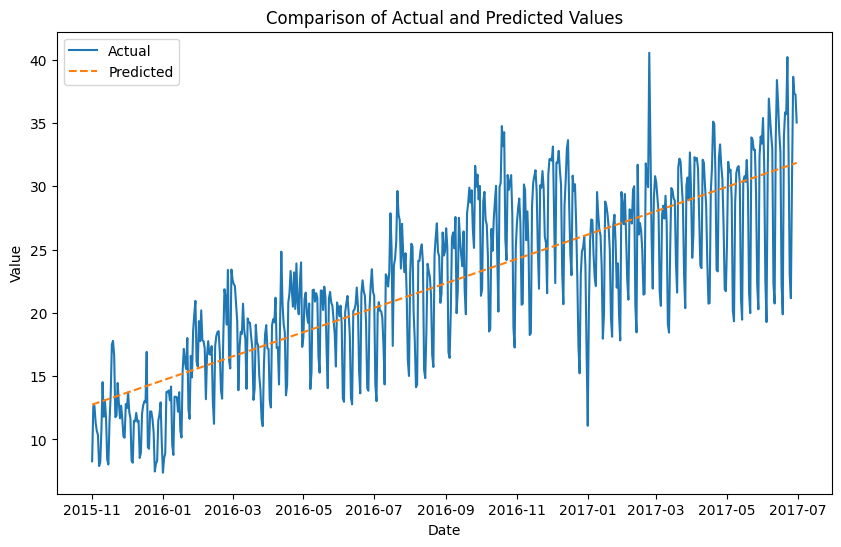

Mean Absolute Error: 3.440058435263404
Mean Squared Error: 18.545690455742978
Root Mean Squared Error: 4.306470765690042


In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn import metrics

file_path = r'C:\Users\lilvinzivert\yolov8-20230723T171535Z-001\yolov8\traffic_linear_reg.xlsx'
data = pd.read_excel(file_path)

data['Date'] = pd.to_datetime(data['Date'])

data = data.groupby('Date')['Vehicles'].mean().reset_index()

X = data.index.values.reshape(-1, 1) 
y = data['Vehicles'] 


model = LinearRegression()
model.fit(X, y) 

y_pred = model.predict(X)

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred)
plt.xlabel('Vlerat')
plt.ylabel('Vlerat e parashikuara')
plt.title('Vlerat e parashikuara kundrejt vlerave të vërteta')

residuals = y - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Vlerat')
plt.ylabel('Diferenca')
plt.title('Diferenca midis vlerave të parashikuara dhe vlerave të vërteta')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(data['Date'], y, label='Actual')
plt.plot(data['Date'], y_pred, label='Predicted', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()


print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))


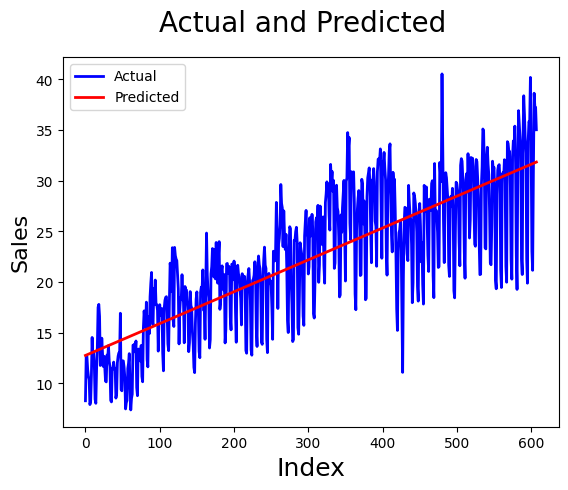

In [94]:
c = data.index.values 
fig = plt.figure()
plt.plot(c, y, color="blue", linewidth=2, linestyle="-", label="Actual")
plt.plot(c, y_pred, color="red", linewidth=2, linestyle="-", label="Predicted")
fig.suptitle('Actual and Predicted', fontsize=20) 
plt.xlabel('Index', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.legend()
plt.show()

In [40]:
import pandas as pd

file_path = r'C:\Users\lilvinzivert\yolov8-20230723T171535Z-001\yolov8\traffic_linear_reg.xlsx'
data = pd.read_excel(file_path)

data['Date'] = pd.to_datetime(data['Date'])

data['Date'] = data['Date'].dt.date

average_by_date = data.groupby('Date')['Vehicles'].mean().reset_index()

print(average_by_date)

           Date   Vehicles
0    2015-11-01   8.277778
1    2015-11-02  12.625000
2    2015-11-03  12.652778
3    2015-11-04  11.361111
4    2015-11-05  10.694444
..          ...        ...
603  2017-06-26  30.791667
604  2017-06-27  38.635417
605  2017-06-28  37.281250
606  2017-06-29  37.239583
607  2017-06-30  35.031250

[608 rows x 2 columns]


In [13]:
print("Shape of X_train:", X_train.shape)
print("X_train:", X_train)


Shape of X_train: (486, 0)
X_train: []


R-squared (R2) Value for linear Kernel: 0.61
R-squared (R2) Value for poly Kernel: 0.44
R-squared (R2) Value for rbf Kernel: 0.64
R-squared (R2) Value for sigmoid Kernel: -35.19
R-squared (R2) Value for precomputed Kernel: 0.61


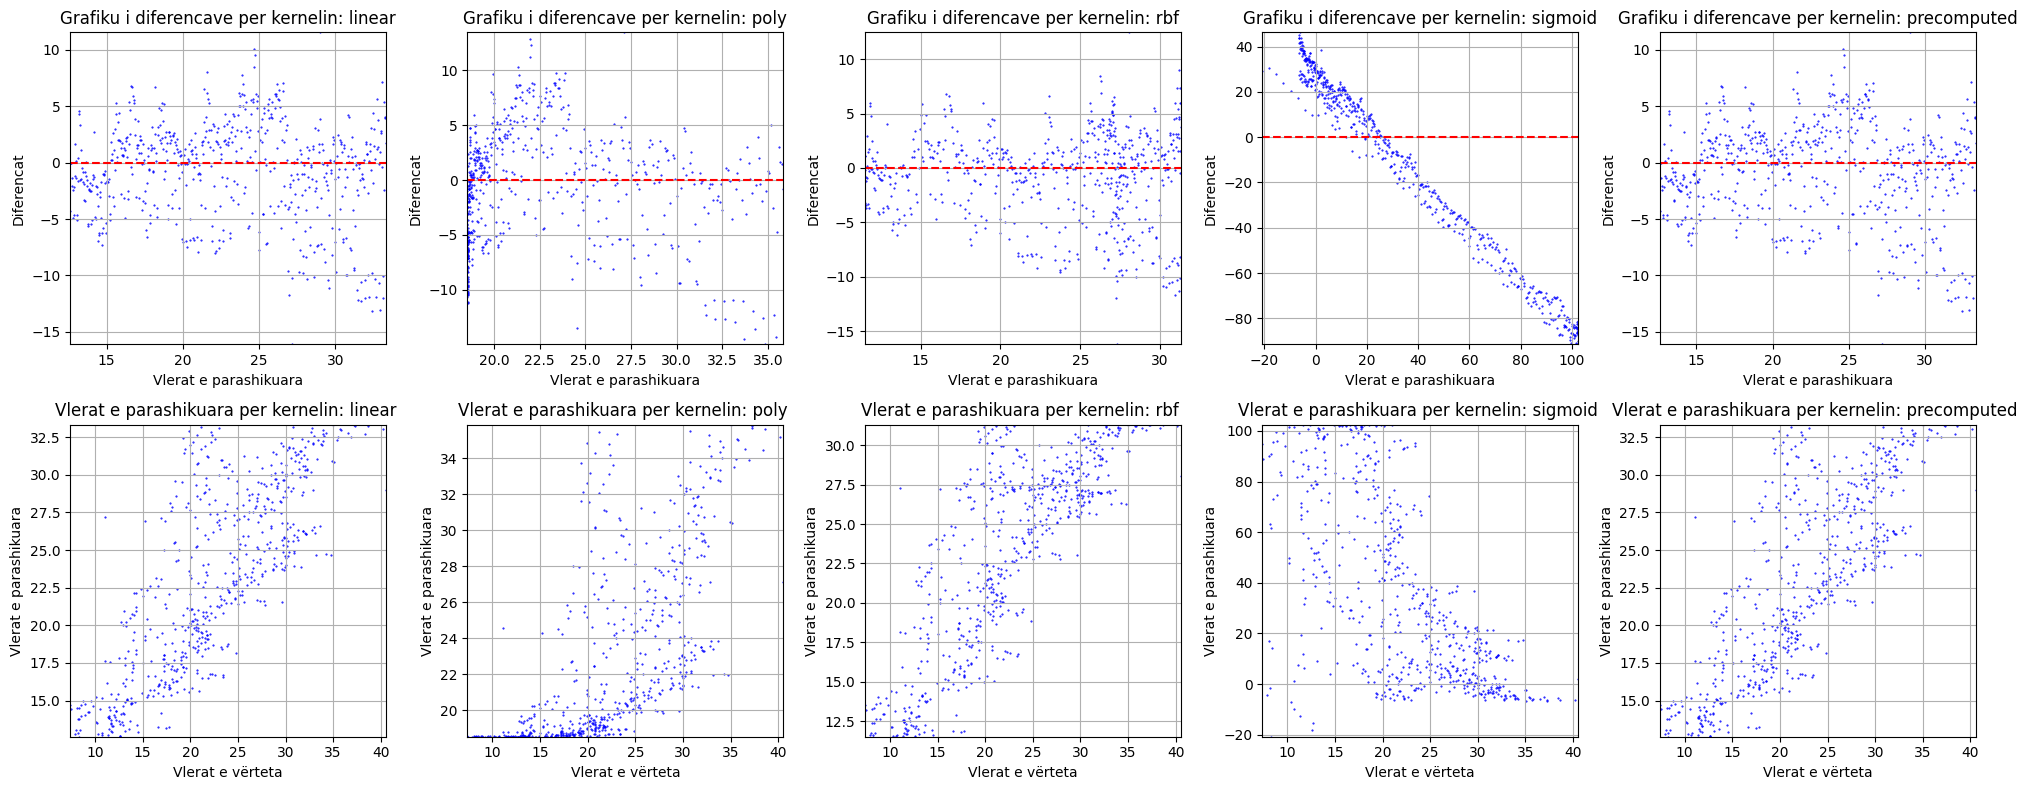

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics.pairwise import pairwise_kernels

from sklearn.svm import SVR
data = average_by_date
data['Date'] = pd.to_datetime(data['Date'])

X = np.arange(len(data)).reshape(-1, 1)
y = data['Vehicles']


model = SVR(kernel='linear')
model.fit(X, y)

y_pred = model.predict(X)


residuals = y - y_pred

kernels = ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']


fig, axes = plt.subplots(2, len(kernels), figsize=(4 * len(kernels), 8)) 
plt.subplots_adjust(wspace=0.2)

for i, kernel in enumerate(kernels):
    if kernel == 'precomputed':
        kernel_matrix = pairwise_kernels(X, metric='linear')
        model = SVR(kernel='precomputed')
        model.fit(kernel_matrix, y)
        y_pred = model.predict(kernel_matrix)
    else:
        model = SVR(kernel=kernel)
        model.fit(X, y)
        y_pred = model.predict(X)

    r2 = r2_score(y, y_pred)
    print(f'R-squared (R2) Value for {kernel} Kernel: {r2:.2f}')

    residuals = y - y_pred


    axes[0, i].scatter(y_pred, residuals, s=1, c='blue', marker='.')
    axes[0, i].axhline(y=0, color='r', linestyle='--')
    axes[0, i].set_xlim([min(y_pred), max(y_pred)])  
    axes[0, i].set_ylim([min(residuals), max(residuals)]) 
    axes[0, i].set_title(f'Grafiku i diferencave per kernelin: {kernel}')
    axes[0, i].grid(True)  
    axes[0, i].set_xlabel('Vlerat e parashikuara')
    axes[0, i].set_ylabel('Diferencat')


    axes[1, i].scatter(y, y_pred, s=1, c='blue', marker='.')
    axes[1, i].set_xlim([min(y), max(y)])  
    axes[1, i].set_ylim([min(y_pred), max(y_pred)])  
    axes[1, i].set_title(f'Vlerat e parashikuara per kernelin: {kernel} ')
    axes[1, i].grid(True)  
    axes[1, i].set_xlabel('Vlerat e vërteta')
    axes[1, i].set_ylabel('Vlerat e parashikuara')

plt.tight_layout()  
plt.savefig("svrB.png")

plt.show()
